In [17]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [18]:
folder_base = '/Users/emiliebertholet/cernbox/coldbox_data'

In [3]:
!ls /Users/emiliebertholet/cernbox/coldbox_data

adc_data_run_25036_ch_40_all.npy adc_data_run_25068_ch_37_all.npy
adc_data_run_25050_ch_37_all.npy adc_data_run_25071_ch_37_all.npy
adc_data_run_25066_ch_40_all.npy adc_data_run_25087_ch_37_all.npy


In [6]:
filename = f'{folder_base}/adc_data_run_25036_ch_40_all.npy' # neutrons
# (16600, 65536): 16600 = "rows"; 65536 = "columns"
# filename = f'{folder_base}/adc_data_run_25066_ch_40_all.npy' # cosmcis #(4200, 262144)
data = np.load(filename, allow_pickle=True).astype(np.int16)
data.shape


(16600, 65536)

In [ ]:
# all = data.flatten()

In [7]:
def fast_plot(data):
    fig, axs = plt.subplots(1, 1, figsize=(12, 2))
    axs.plot(data.transpose())
    axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

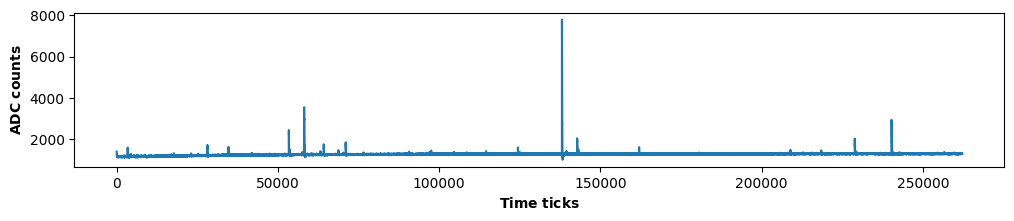

In [18]:
fast_plot(data[0])

In [19]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

## Find Peaks



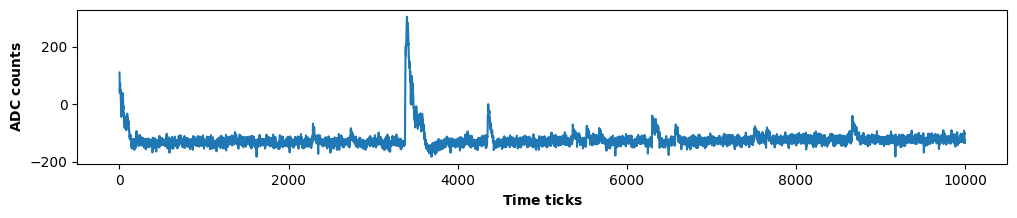

In [20]:
row = data[0]
row = substract_peds(row)
fast_plot(row[:10000])

found 10 peaks


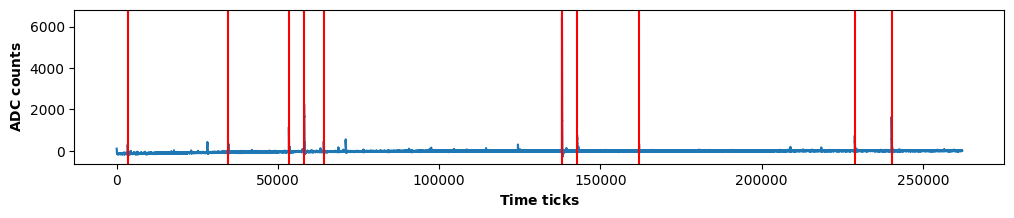

In [21]:
r = row #[:10000]
# peaks, heights = find_peaks(data, height=1000, distance=150, prominence = 100, plateau_size = 0)
# peaks, peak_dict = find_peaks(r, height=200, distance=100, prominence=100, rel_height=1.0, plateau_size=0, width=0 ) 
# plateau_size=0: corresponds to the minimum (i.e. it doesn't do anything but it adds the information in the dictionary of peaks)
# width=0: same as plateau -> added to get additional info.
peaks, peak_dict = find_peaks(r, height=None, distance=100, prominence=200, wlen=100,  plateau_size=0, width=0 ) 
print(f'found {len(peaks)} peaks')

fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(r.transpose())
for p in peaks:
    axs.axvline(x = p, color = 'r')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# axs.set_xlim(4000,5000);

In [22]:
# peak_dict

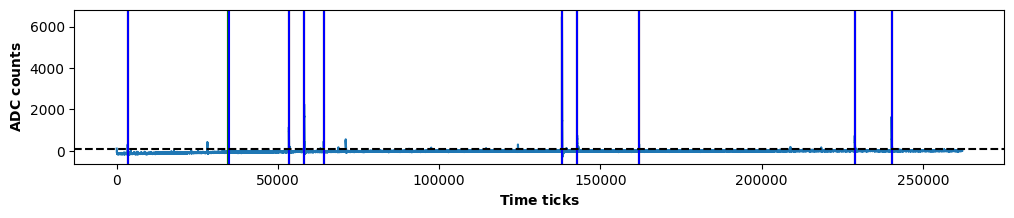

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(r.transpose())
for p in peak_dict['left_edges']:
    axs.axvline(x = p, color = 'r')
for p in peak_dict['left_ips']:
    axs.axvline(x = p, color = 'g')
for p in peak_dict['right_ips']:
    axs.axvline(x = p, color = 'b')
axs.axhline(y = 100, color = 'black', linestyle='--')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# axs.set_xlim(2500,4000)

(0.0, 4000.0)

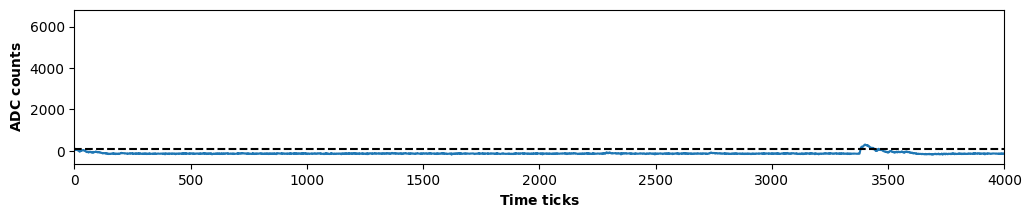

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(r.transpose())
peak_id=1
axs.axvline(x = peak_dict['left_edges'][peak_id], color = 'r')
axs.axvline(x = peak_dict['left_ips'][peak_id], color = 'g')
axs.axvline(x = peak_dict['right_ips'][peak_id], color = 'b')
axs.axhline(y = 100, color = 'black', linestyle='--')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
axs.set_xlim(0,4000)

In [25]:
# peak_dict['left_edges'][0]

found 1 peaks


IndexError: index 3 is out of bounds for axis 0 with size 1

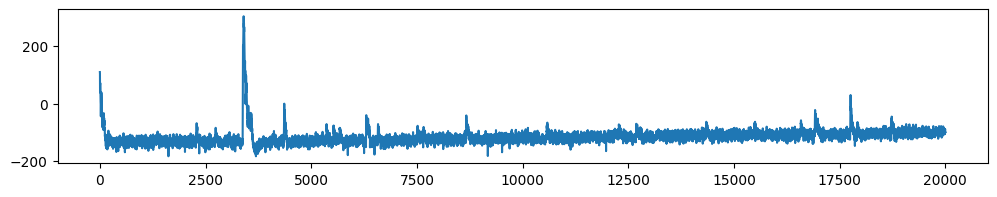

In [26]:
r = row[:20000]
prom = 100
rel_height = 0.9
# peaks, peak_dict = find_peaks(r, height=200, distance=100, prominence=prom, rel_height=rel_height, plateau_size=0, width=0 ) #, prominence=100, 
# plateau_size=0: corresponds to the minimum (i.e. it doesn't do anything but it adds the information in the dictionary of peaks)
# width=0: same as plateau -> added to get additional info.
peaks, peak_dict = find_peaks(r, height=None, distance=100, prominence=200, rel_height=rel_height, wlen=None,  plateau_size=0, width=0 ) 
print(f'found {len(peaks)} peaks')

fig, axs = plt.subplots(1, 1, figsize=(12, 2))
axs.plot(r.transpose())
peak_id=3
axs.axvline(x = peak_dict['left_edges'][peak_id], color = 'r')
axs.axvline(x = peak_dict['left_ips'][peak_id], color = 'g', linestyle='--')
axs.axvline(x = peak_dict['right_ips'][peak_id], color = 'b', linestyle='--')
axs.axvline(x = peak_dict['left_bases'][peak_id], color = 'g')
axs.axvline(x = peak_dict['right_bases'][peak_id], color = 'b')
axs.axhline(y = 100, color = 'black', linestyle='--')
axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
# axs.set_xlim(6000,5000)

In [168]:
id = 3
for p in peak_dict:
    print(p, peak_dict[p][id])

plateau_sizes 1
left_edges 4569
right_edges 4569
prominences 3591.0
left_bases 3866
right_bases 4836
widths 157.28657894736807
width_heights 329.0999999999999
left_ips 4554.413421052632
right_ips 4711.7


In [124]:
id = 3
for p in peak_dict:
    print(p, peak_dict[p][id])

plateau_sizes 1
left_edges 4569
right_edges 4569
peak_heights 3561.0
prominences 3591.0
left_bases 3866
right_bases 4836
widths 68.66935596049552
width_heights 1765.5
left_ips 4557.138336347197
right_ips 4625.807692307692


In [134]:
r[4836]

np.int64(-119)

In [94]:
# r = all
# peaks, peak_dict = find_peaks(r, height=None, distance=100, prominence=200, rel_height=rel_height, wlen=None,  plateau_size=0, width=0 ) 
# print(f'found {len(peaks)} peaks')

# with open('peaks_neutrons.pkl', 'wb') as file:
#     pickle.dump(peak_dict, file)

# with open('peaks_cosmics.pkl', 'wb') as file:
#     pickle.dump(peak_dict, file)


# r = data[:, 3000:6000].flatten()
# peaks, peak_dict = find_peaks(r, height=None, distance=100, prominence=200, rel_height=0.9, wlen=None,  plateau_size=0, width=0 ) 
# print(f'found {len(peaks)} peaks')
# with open('peaks_neutronsSel.pkl', 'wb') as file:
#     pickle.dump(peak_dict, file)


In [95]:
# r = data[:, 3000:6000].flatten()
# peaks, peak_dict = find_peaks(r, height=None, distance=100, prominence=200, rel_height=0.9, wlen=None,  plateau_size=0, width=0 ) 
# peaks

In [93]:
# peak_dict

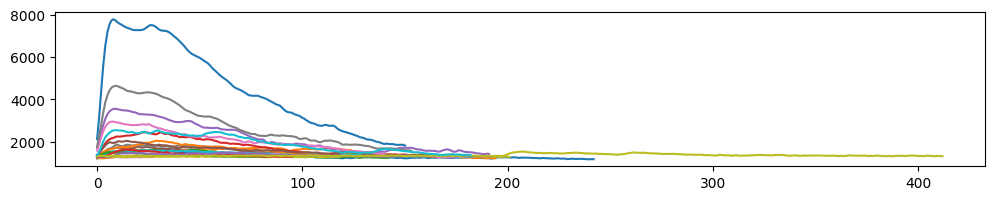

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(12, 2))
for i in range(0, 20):
    le = int(np.ceil(peak_dict['left_ips'][i]))
    ri = int(np.ceil(peak_dict['right_ips'][i]))
    axs.plot(r[le:ri].transpose())

# Useful info to find outliers

- look at the ```widths``` entry it gives the size of the window

In [19]:
with open('peaks_neutronsSel.pkl', 'rb') as file:
    gn_peaks = pickle.load(file)

with open('peaks_neutrons.pkl', 'rb') as file:
    n_peaks = pickle.load(file)

with open('peaks_cosmics.pkl', 'rb') as file:
    c_peaks = pickle.load(file)

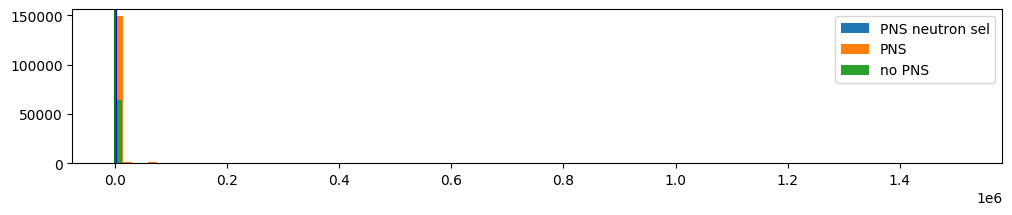

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
ax.hist(gn_peaks['widths'], bins=100, label='PNS neutron sel');
ax.hist(n_peaks['widths'], bins=100, label='PNS');
ax.hist(c_peaks['widths'], bins=100, label='no PNS');

ax.axvline(x = gn_peaks['widths'].mean(), color = 'b');
ax.axvline(x = n_peaks['widths'].mean(), color = 'orange');
ax.axvline(x = c_peaks['widths'].mean(), color = 'g');
ax.legend();

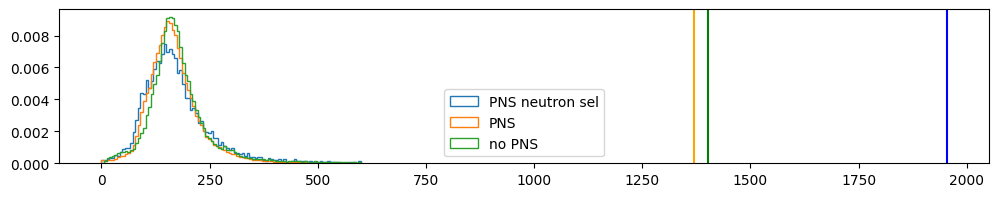

In [21]:
rg = (0, 600)
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
ax.hist(gn_peaks['widths'], bins=100, label='PNS neutron sel', range=rg, histtype='step', density=True);
ax.hist(n_peaks['widths'], bins=100, label='PNS', range=rg, histtype='step', density=True);
ax.hist(c_peaks['widths'], bins=100, label='no PNS', range=rg, histtype='step', density=True);
ax.axvline(x = gn_peaks['widths'].mean(), color = 'b');
ax.axvline(x = n_peaks['widths'].mean(), color = 'orange');
ax.axvline(x = c_peaks['widths'].mean(), color = 'g');
ax.legend();

In [22]:
def check_peak_width(peaks, cut=600):
    print(f"mean = {peaks['widths'].mean():.2f}     std = {peaks['widths'].std():.2f}")
    print(f"min  = {peaks['widths'].min():.2f}      max = {peaks['widths'].max():.2f}")
    print(f"Found {(peaks['widths']<0).sum()} negative widths  (sanity check)")
    print(f"Pecentage of entries with a width > {cut} = {(peaks['widths']>cut).sum()*100/len(peaks['widths']):.2f} %")

In [23]:
check_peak_width(gn_peaks, cut=600)

mean = 1954.22     std = 8383.60
min  = 2.10      max = 535871.69
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 21.89 %


In [24]:
check_peak_width(n_peaks, cut=600)

mean = 1368.44     std = 13946.04
min  = 1.49      max = 1507326.95
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 3.94 %


In [25]:
check_peak_width(c_peaks, cut=600)

mean = 1401.09     std = 14461.60
min  = 3.53      max = 1268511.63
Found 0 negative widths  (sanity check)
Pecentage of entries with a width > 600 = 8.87 %


# Outliers?

In [26]:
folder_base = '/Users/emiliebertholet/cernbox/coldbox_data'
filename = f'{folder_base}/adc_data_run_25036_ch_40_all.npy' # neutrons
gn_data = np.load(filename, allow_pickle=True).astype(np.int16)
gn_data = gn_data[:, 3000:6000]
gn_data_flat = gn_data.flatten()

# with open('peaks_neutronsSel.pkl', 'rb') as file:
#     gn_peaks = pickle.load(file)

print(gn_data.shape)
print(gn_data_flat.shape)
print(gn_peaks.keys())
print(len(gn_peaks['left_edges']))

(16600, 3000)
(49800000,)
dict_keys(['plateau_sizes', 'left_edges', 'right_edges', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])
17018


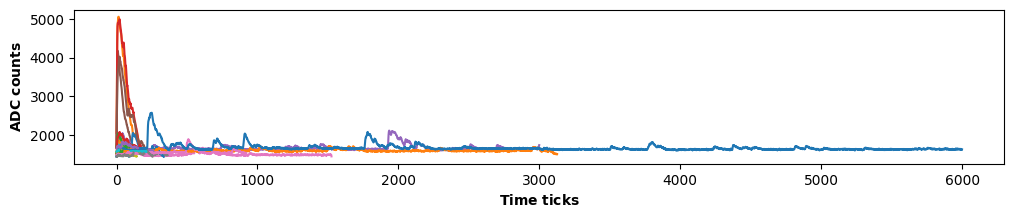

In [80]:
## Outliers?
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
for i in np.arange(0, 25, 1):
    l = int(np.ceil(gn_peaks['left_ips'][i]))
    r = int(np.ceil(gn_peaks['right_ips'][i]))
    ax.plot(gn_data_flat[l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

29999.207 35999.389108910895
peak position 30250
peak height 2572
width 6000.182108910896


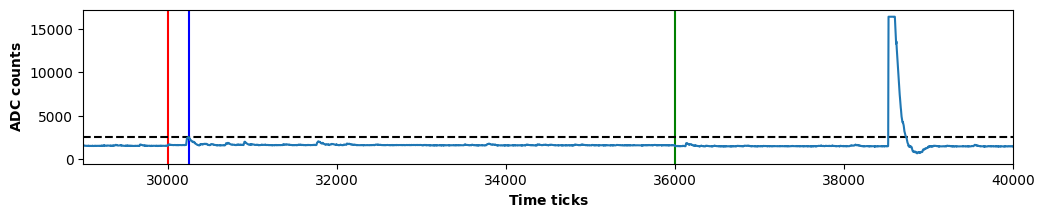

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
i = 20
ax.axvline(x = gn_peaks['left_ips'][i], color = 'r')
ax.axvline(x = gn_peaks['right_ips'][i], color = 'g')
ax.axvline(x = gn_peaks['left_edges'][i], color = 'b')
ax.axhline(y = gn_data_flat[gn_peaks['left_edges'][i]], color = 'black', linestyle='--')
ax.plot(gn_data_flat.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_xlim(29000, 40000);
# ax.set_xlim(35000, 38000);



print(gn_peaks['left_ips'][i], gn_peaks['right_ips'][i])
print(f'peak position', gn_peaks['left_edges'][i])
print(f'peak height', gn_data_flat[gn_peaks['left_edges'][i]])
print(f'width', gn_peaks['widths'][i])




### Focus on one thing

7475 9001


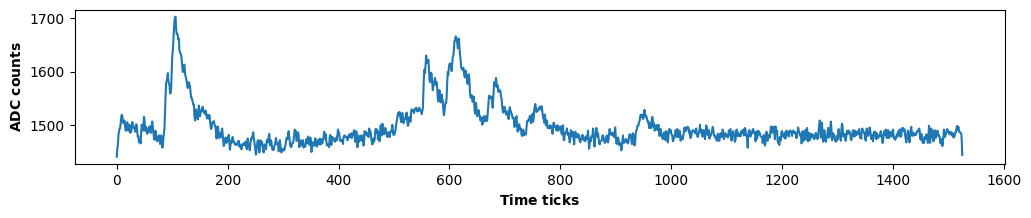

In [87]:
## Outliers?
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
for i in np.arange(6, 7, 1):
    l = int(np.ceil(gn_peaks['left_ips'][i]))
    r = int(np.ceil(gn_peaks['right_ips'][i]))
    ax.plot(gn_data_flat[l:r].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
print(l, r)

(0.0, 2500.0)

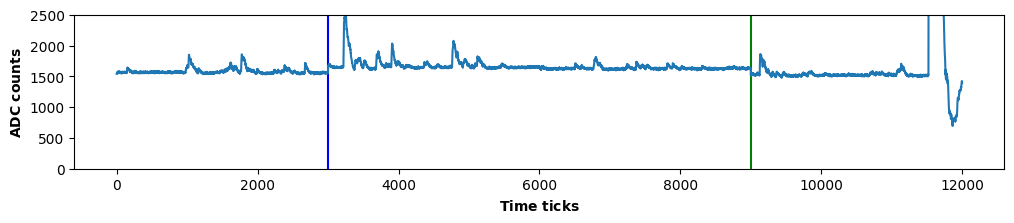

In [89]:
l, r = 30000, 36000 # id = 20
# l, r = 7475, 9001 # id = 6
a =  3000
out = gn_data_flat[l-a:r+a]

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
ax.axvline(x = l-(l-a), color = 'b')
ax.axvline(x = r-(l-a), color = 'g')
ax.plot(out.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_ylim(0, 2500)

(0.0, 2500.0)

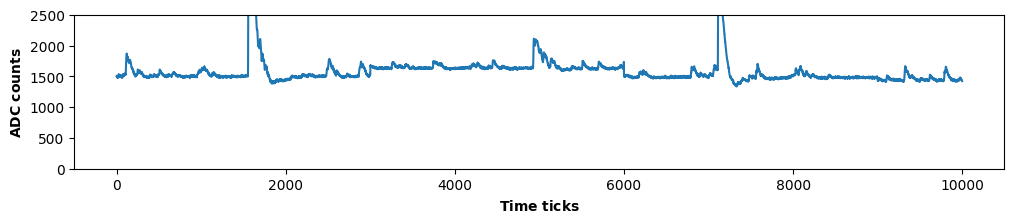

In [91]:
l, r = 0, 10000 
out = gn_data_flat[l:r]

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
# ax.axvline(x = l-(l-a), color = 'b')
# ax.axvline(x = r-(l-a), color = 'g')
ax.plot(out.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_ylim(0, 2500)